In [2]:
import os
os.getcwd()

'C:\\Users\\sadhana reddy\\Desktop\\Projects\\Iris'

In [3]:
os.chdir('C:\\Users\\sadhana reddy\\desktop\\Projects\\Iris')

In [4]:
os.getcwd()

'C:\\Users\\sadhana reddy\\Desktop\\Projects\\Iris'

In [5]:
import numpy as np
import pandas as pd

In [6]:
Iris_data = pd.read_csv('Iris data.csv')

In [7]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
Iris_data.head()

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#Renaming columns
Iris_data.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','FlowerClass']

In [10]:
Iris_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'FlowerClass'],
      dtype='object')

In [11]:
Iris_data.isnull().values.any()
# To find if there exists any null values and which row in specific ## Iris_data.FlowerClass.isnull()

False

In [12]:
#converting FlowerClass to category
Iris_data.FlowerClass = Iris_data.FlowerClass.astype('category')

In [13]:
Iris_data.FlowerClass.unique()

[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

# Visualizing 4 dimensions using scatter plot

In [14]:
Iris_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'FlowerClass'],
      dtype='object')

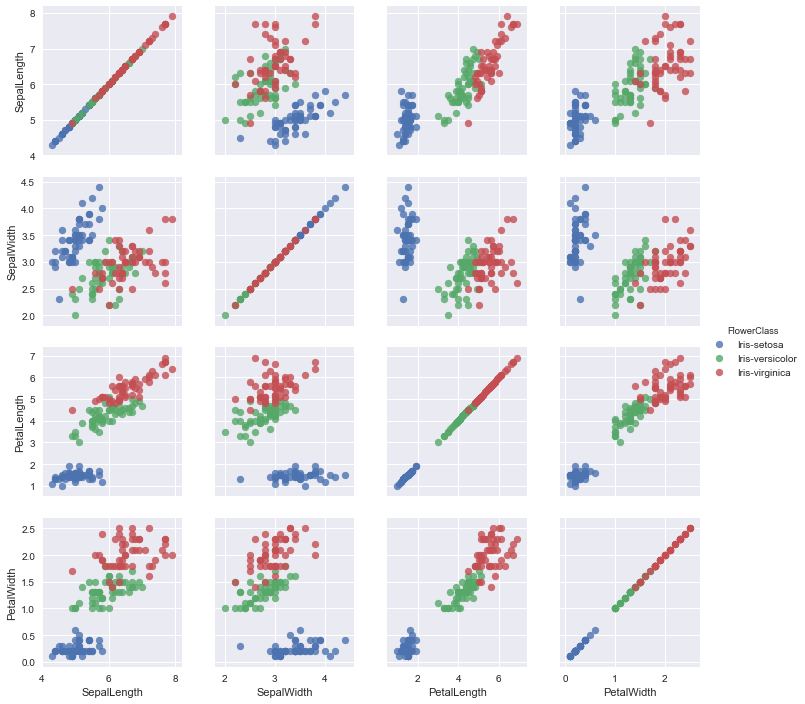

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.PairGrid(Iris_data, vars=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
                 hue='FlowerClass',diag_sharey=False)
g.map(plt.scatter, alpha=0.8)
g.add_legend()
plt.show()

# Data Pre-Processing

In [17]:
#creating independent and Dependent Data_Frames
X = Iris_data.iloc[:,:-1].values
Y = Iris_data.iloc[:,-1].values

In [18]:
X.shape

(150, 4)

In [19]:
Y.shape

(150,)

In [20]:
set(Y)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [24]:
import warnings
warnings.filterwarnings('ignore')

cannot use train_test_split on strings nominal variables

In [22]:
# converting categorical variable into Numerical nominal variable
from sklearn.preprocessing import LabelEncoder
LE_y = LabelEncoder()
Y = LE_y.fit_transform(Y)

In [25]:
# split into train and test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state = 0)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


# Implementing svm for different kernels

In [27]:
#applying SVM on data
from sklearn.svm import SVC
svm1 = SVC(C=100, kernel='linear', degree=3, decision_function_shape='ovr', random_state= 0)
svm_linear = svm1.fit(x_train,y_train)

#predicting the output for test set to validate
y_pred = svm1.predict(x_test)

#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
CM_linear = confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
Accuracy_linear = accuracy_score(y_test,y_pred)
print(CM_linear)
print('Accuracy is :',Accuracy_linear)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
Accuracy is : 0.96


In [28]:
#Gaussian Kernel SVM
from sklearn.svm import SVC
svm_gaussian = SVC(C=100, kernel='rbf', degree=3, decision_function_shape='ovr', random_state= 0)
svm2 = svm_gaussian.fit(x_train,y_train)

#Applying Prediction on test set 
y_pred = svm_gaussian.predict(x_test)

#finiding accuracy and confusion matrix for gaussian Kernel SVM
from sklearn.metrics import confusion_matrix, accuracy_score
CM_rbf = confusion_matrix(y_test,y_pred)
Accuracy_rbf = accuracy_score(y_test,y_pred)
print(CM_rbf)
print('Accuracy for Gaussian Kernel SVM is:',Accuracy_rbf)

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
Accuracy for Gaussian Kernel SVM is: 0.98


In [29]:
#Implementing Sigmoid kernel
from sklearn.svm import SVC
svm_sigmoid = SVC(C=100, kernel='sigmoid', random_state= 0)
svm3 = svm_sigmoid.fit(x_train,y_train)

#Applying sigmoid kernel on test set
y_pred = svm_sigmoid.predict(x_test)

#finiding accuracy and confusion matrix for gaussian Kernel SVM
from sklearn.metrics import confusion_matrix, accuracy_score
CM_sigmoid = confusion_matrix(y_test,y_pred)
Accuracy_sigmoid = accuracy_score(y_test,y_pred)
print(CM_rbf)
print('Accuracy for Sigmoid Kernel SVM is:',Accuracy_sigmoid)

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
Accuracy for Sigmoid Kernel SVM is: 0.3


In [30]:
#Implementing Poly kernel
from sklearn.svm import SVC
svm_poly = SVC(C=100, kernel='poly', degree = 3,random_state= 0)
svm4 = svm_poly.fit(x_train,y_train)

#Applying Poly with degree-3 kernel on test set
y_pred = svm_poly.predict(x_test)

#finiding accuracy and confusion matrix for gaussian Kernel SVM
from sklearn.metrics import confusion_matrix, accuracy_score
CM_poly = confusion_matrix(y_test,y_pred)
Accuracy_poly = accuracy_score(y_test,y_pred)
print(CM_poly)
print('Accuracy for poly(degree-3)Kernel SVM is:',Accuracy_poly)

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
Accuracy for poly(degree-3)Kernel SVM is: 0.98


In [31]:
#Implementing NuSVC with nu as 0.61
from sklearn.svm import NuSVC
svm_Nu = NuSVC(nu=0.61, kernel='rbf', degree=3, decision_function_shape='ovo', random_state= 0)
svm5 = svm_Nu.fit(x_train,y_train)

y_pred = svm_Nu.predict(x_test)

#finiding accuracy and confusion matrix for  SVM
from sklearn.metrics import confusion_matrix, accuracy_score
CM_NuSVC = confusion_matrix(y_test,y_pred)
Accuracy_NuSVC = accuracy_score(y_test,y_pred)
print(CM_poly)
print('Accuracy for NuSVM is:',Accuracy_NuSVC)

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
Accuracy for NuSVM is: 0.98


In [32]:
#Implementing Linear kernel with SVCLinear
from sklearn.svm import LinearSVC
svm_LinearSVC = LinearSVC(C=100, multi_class='ovr', random_state= 0, max_iter=1000)
svm6 = svm_LinearSVC.fit(x_train,y_train)

y_pred = svm_LinearSVC.predict(x_test)

#finiding accuracy and confusion matrix for gaussian Kernel SVM
from sklearn.metrics import confusion_matrix, accuracy_score
CM_LinearSVC = confusion_matrix(y_test,y_pred)
Accuracy_LinearSVC = accuracy_score(y_test,y_pred)
print(CM_LinearSVC)
print('Accuracy for LinearSVC is:',Accuracy_LinearSVC)

[[16  0  0]
 [ 0 17  2]
 [ 0  0 15]]
Accuracy for LinearSVC is: 0.96


Visualizing variance in accuracy rate across Various SVM

In [75]:
Accuracy_list = {0:'linear',1:'rbf',2:'sigmoid',
                 3:'poly',4:'NuSVC',5:'LinearSVC'}
Acc = list(Accuracy_list.keys())

In [76]:
Accuracy_percent = [Accuracy_linear*100,Accuracy_rbf*100,
                    Accuracy_sigmoid*100,Accuracy_poly*100,Accuracy_NuSVC*100,Accuracy_LinearSVC*100]

In [77]:
Legend = list(Accuracy_list.values())

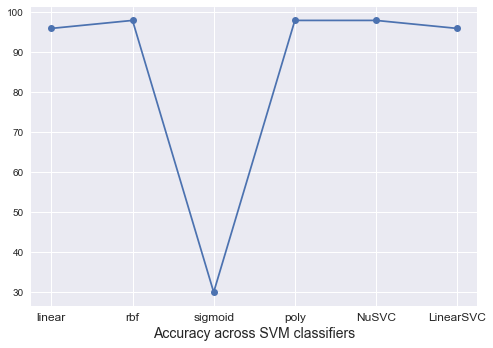

In [78]:
plt.plot(Acc,Accuracy_percent,marker = 'o',linestyle = '-')
plt.xlabel('Accuracy across SVM classifiers', fontsize = 14)
plt.xticks(Acc,Legend,fontsize = 12)
plt.show()

# visualizing SVM for two features at a time in subplots to understand the implementation differences

1. Using SEPAL parameters (Sepal Length and Sepal Width) to visualize the classification
2. Using PETAL parameters (Sepal Length and Sepal Width) to visualize the classification

As above Accuracy plot shows SVM of rbf anf poly(degree 3) have the highest accuracy, using these two methods to visualize

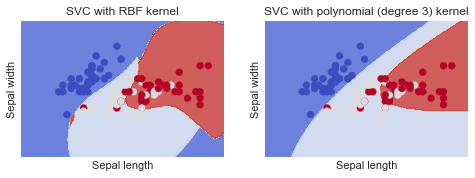

In [132]:
h = .02  
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with RBF kernel','SVC with polynomial (degree 3) kernel']
svm_gaussian.fit(x_train[:,:2],y_train)
svm_poly.fit(x_train[:,:2],y_train)
 
for i, clf in enumerate((svm_gaussian, svm_poly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

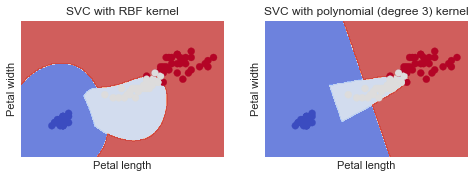

In [133]:
h = .02  
x_min, x_max = x_test[:, 2].min() - 1, x_test[:, 2].max() + 1
y_min, y_max = x_test[:, 3].min() - 1, x_test[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with RBF kernel','SVC with polynomial (degree 3) kernel']
svm_gaussian.fit(x_train[:,2:],y_train)
svm_poly.fit(x_train[:,2:],y_train)
 
for i, clf in enumerate((svm_gaussian, svm_poly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(x_train[:, 2], x_train[:, 3], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

# Visualizing three features at a time and identifying the accuracy of class labels

1. Sepal length, sepal width and petal length
2. Sepal length, sepal width and petal width
3. sepal length, petal length and petal width
4. sepal width, petal length and petal width

In [192]:
del x_train,x_test,y_train,y_test

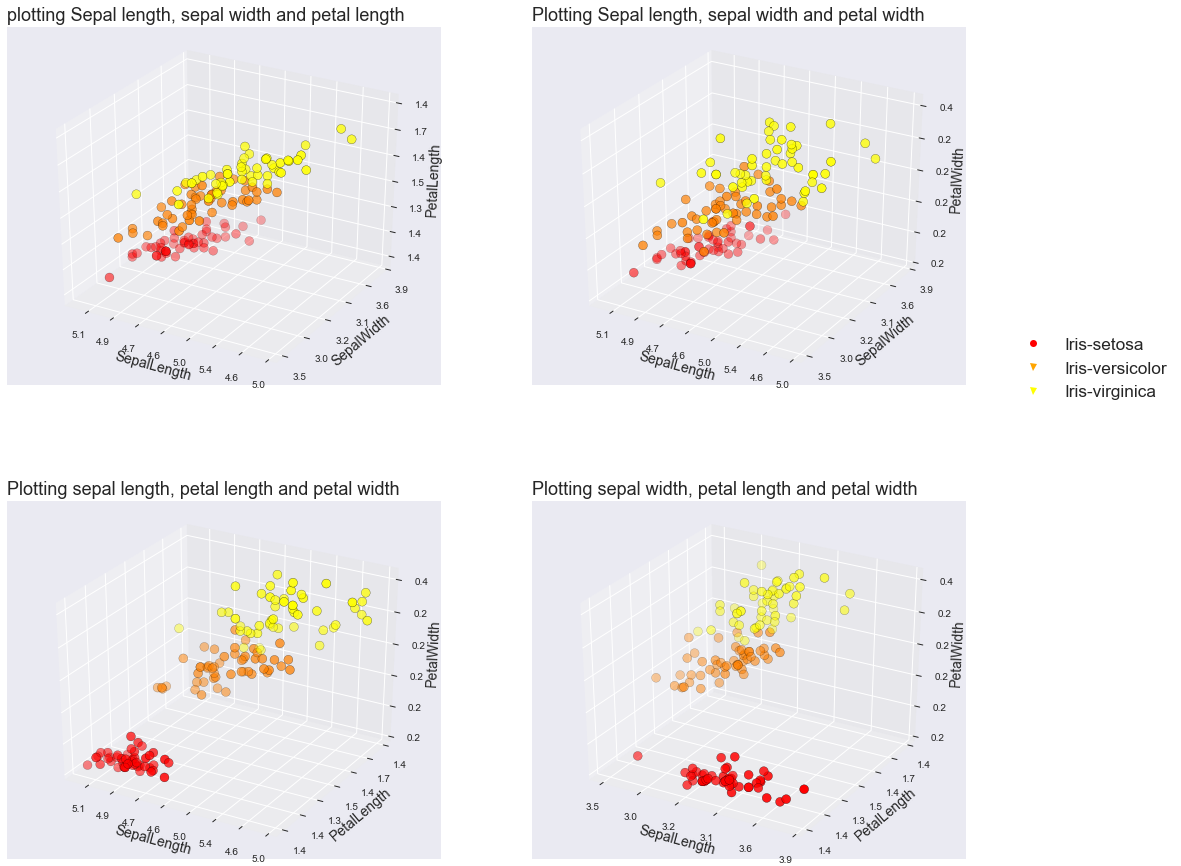

In [407]:
import matplotlib.pyplot as plt
import matplotlib.lines as ml
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize= (14,12))#plt.figaspect(0.5))
#ax3D = Axes3D(fig, elev=-150, azim=110)

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')

# plotting Sepal length, sepal width and petal length
plot1 = ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=Y,cmap=plt.cm.autumn, edgecolor='k', s=80)
#title and label marks
ax.set_title("plotting Sepal length, sepal width and petal length",loc='left',
            fontdict = {'fontsize': 18,'fontweight' : 2})
ax.set_xlabel("SepalLength",fontsize= '14')
ax.w_xaxis.set_ticklabels(X[:, 0])
ax.set_ylabel("SepalWidth", fontsize= '14')
ax.w_yaxis.set_ticklabels(X[:, 1])
ax.set_zlabel("PetalLength",fontsize= '14')
ax.w_zaxis.set_ticklabels(X[:, 2])

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 2, projection='3d')

# Plotting Sepal length, sepal width and petal width
plot2 = ax.scatter(X[:, 0], X[:, 1], X[:, 3],c=Y,cmap=plt.cm.autumn, edgecolor='k', s=80)
#title and label marks
ax.set_title("Plotting Sepal length, sepal width and petal width",loc='left',
            fontdict = {'fontsize': 18,'fontweight' : 2})
ax.set_xlabel("SepalLength",fontsize= '14')
ax.w_xaxis.set_ticklabels(X[:, 0])
ax.set_ylabel("SepalWidth",fontsize= '14')
ax.w_yaxis.set_ticklabels(X[:, 1])
ax.set_zlabel("PetalWidth",fontsize= '14')
ax.w_zaxis.set_ticklabels(X[:, 3])

# set up the axes for the Third plot
ax = fig.add_subplot(2, 2, 3, projection='3d')

# Plotting sepal length, petal length and petal width
plot3 = ax.scatter(X[:, 0], X[:, 2], X[:, 3],c=Y,cmap=plt.cm.autumn, edgecolor='k', s=80)
#title and label marks
ax.set_title("Plotting sepal length, petal length and petal width",loc='left',
            fontdict = {'fontsize': 18,'fontweight' : 2})
ax.set_xlabel("SepalLength",fontsize= '14')
ax.w_xaxis.set_ticklabels(X[:, 0])
ax.set_ylabel("PetalLength",fontsize= '14')
ax.w_yaxis.set_ticklabels(X[:, 2])
ax.set_zlabel("PetalWidth",fontsize= '14')
ax.w_zaxis.set_ticklabels(X[:, 3])

# set up the axes for the fourth plot
ax = fig.add_subplot(2, 2, 4, projection='3d')

# Plotting sepal width, petal length and petal width
plot4 = ax.scatter(X[:, 1], X[:, 2], X[:, 3],c=Y,cmap=plt.cm.autumn, edgecolor='k', s=80)
#title and label marks

from matplotlib.pyplot import rcParams

ax.set_title("Plotting sepal width, petal length and petal width",loc='left',
             fontdict = {'fontsize': 18,'fontweight' : 2})
ax.set_xlabel("SepalLength",fontsize= '14')
ax.w_xaxis.set_ticklabels(X[:, 1])
ax.set_ylabel("PetalLength",fontsize= '14')
ax.w_yaxis.set_ticklabels(X[:, 2])
ax.set_zlabel("PetalWidth",fontsize= '14')
ax.w_zaxis.set_ticklabels(X[:, 3])


# create legend
scatter1_proxy = ml.Line2D([0],[0], linestyle="none", c="Red", marker = 'o')
scatter2_proxy = ml.Line2D([0],[0], linestyle="none", c="Orange", marker = 'v')
scatter3_proxy = ml.Line2D([0],[0], linestyle="none", c="Yellow", marker = 'v')
ax.legend([scatter1_proxy, scatter2_proxy, scatter3_proxy], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
         ,bbox_to_anchor = (1.5,1.5), fontsize = 'x-large')

plt.tight_layout(pad=0.5, w_pad=4, h_pad=8)
plt.show()


In [265]:
set(Iris_data.FlowerClass)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [278]:
Iris_data[(Iris_data.PetalWidth == 0) | (Iris_data.PetalLength ==0) | (Iris_data.SepalWidth ==0) | (Iris_data.SepalLength ==0)]

,SepalLength,SepalWidth,PetalLength,PetalWidth,FlowerClass


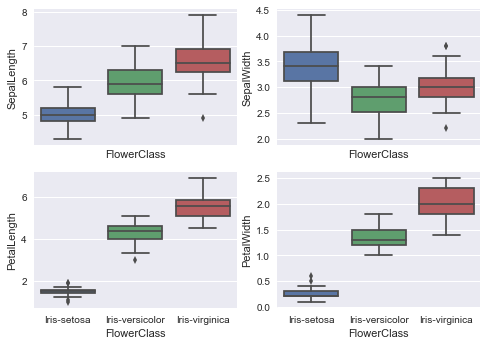

In [291]:
f, ax = plt.subplots(2,2,sharex=True, sharey=False)
plt1 = sns.boxplot(y = Iris_data.SepalLength,x = Iris_data.FlowerClass,ax = ax[0][0])
plt2 = sns.boxplot(y = Iris_data.SepalWidth ,x = Iris_data.FlowerClass,ax = ax[0][1])
plt3 = sns.boxplot(y = Iris_data.PetalLength,x = Iris_data.FlowerClass,ax = ax[1][0])
plt3 = sns.boxplot(y = Iris_data.PetalWidth,x = Iris_data.FlowerClass,ax = ax[1][1])